In [6]:
import yfinance as yf

In [9]:
from prophet import Prophet

In [146]:
df = yf.download("BTC-USD","2015-01-01","2024-08-03")
#GOOG diyebilirsin

[*********************100%%**********************]  1 of 1 completed


In [148]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2024-07-29,68259.054688,69987.539062,66532.593750,66819.914062,66819.914062,40780682628
2024-07-30,66819.054688,66987.671875,65323.191406,66201.015625,66201.015625,31380492109
2024-07-31,66201.273438,66810.210938,64532.046875,64619.250000,64619.250000,31292785994


kapanış fiyatı tahmin edilecek

In [151]:
df = df[["Close"]]

In [153]:
df = df.reset_index()

In [155]:
df

,Date,Close
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
3497,2024-07-29,66819.914062
3498,2024-07-30,66201.015625
3499,2024-07-31,64619.250000
3500,2024-08-01,65357.500000


In [157]:
df.columns=["ds","y"]

In [159]:
df.head(3)

,ds,y
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001


In [161]:
model = Prophet()

In [163]:
model.fit(df)

17:58:49 - cmdstanpy - INFO - Chain [1] start processing
17:58:50 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
gelecek = model.make_future_dataframe(360) #default value:date

In [165]:
tahmin = model.predict(gelecek)

In [166]:
tahmin

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,-507.630683,-6322.960374,5514.826182,-507.630683,-507.630683,-214.789306,-214.789306,-214.789306,-24.493789,-24.493789,-24.493789,-190.295517,-190.295517,-190.295517,0.0,0.0,0.0,-722.419989
1,2015-01-02,-505.481702,-6722.903033,5919.381110,-505.481702,-505.481702,-183.161442,-183.161442,-183.161442,-29.045761,-29.045761,-29.045761,-154.115681,-154.115681,-154.115681,0.0,0.0,0.0,-688.643144
2,2015-01-03,-503.332722,-6857.832973,5545.320379,-503.332722,-503.332722,-148.610017,-148.610017,-148.610017,-21.506999,-21.506999,-21.506999,-127.103018,-127.103018,-127.103018,0.0,0.0,0.0,-651.942738
3,2015-01-04,-501.183741,-6639.265508,5565.740132,-501.183741,-501.183741,-118.186536,-118.186536,-118.186536,-7.971733,-7.971733,-7.971733,-110.214803,-110.214803,-110.214803,0.0,0.0,0.0,-619.370277
4,2015-01-05,-499.034760,-7563.094154,5282.738193,-499.034760,-499.034760,-53.176734,-53.176734,-53.176734,51.046326,51.046326,51.046326,-104.223060,-104.223060,-104.223060,0.0,0.0,0.0,-552.211494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,2025-07-24,86436.776253,70290.987856,100889.441842,71615.885272,101238.156974,-1016.132801,-1016.132801,-1016.132801,-24.493789,-24.493789,-24.493789,-991.639012,-991.639012,-991.639012,0.0,0.0,0.0,85420.643452
3858,2025-07-25,86506.133481,69608.598703,102050.835559,71595.698671,101362.445717,-963.260949,-963.260949,-963.260949,-29.045761,-29.045761,-29.045761,-934.215188,-934.215188,-934.215188,0.0,0.0,0.0,85542.872532
3859,2025-07-26,86575.490709,69677.143970,101568.127558,71601.777160,101486.734459,-901.007779,-901.007779,-901.007779,-21.506999,-21.506999,-21.506999,-879.500780,-879.500780,-879.500780,0.0,0.0,0.0,85674.482930
3860,2025-07-27,86644.847937,69336.757557,101930.534942,71608.826403,101611.023201,-835.740357,-835.740357,-835.740357,-7.971733,-7.971733,-7.971733,-827.768624,-827.768624,-827.768624,0.0,0.0,0.0,85809.107580


C:\Users\ENİSE AHSEN\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ENİSE AHSEN\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


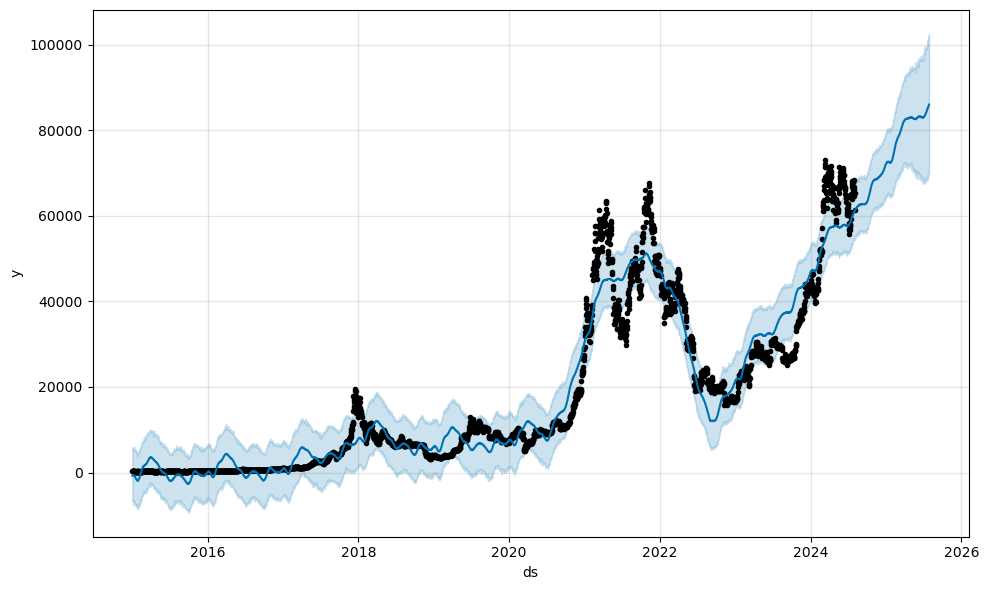

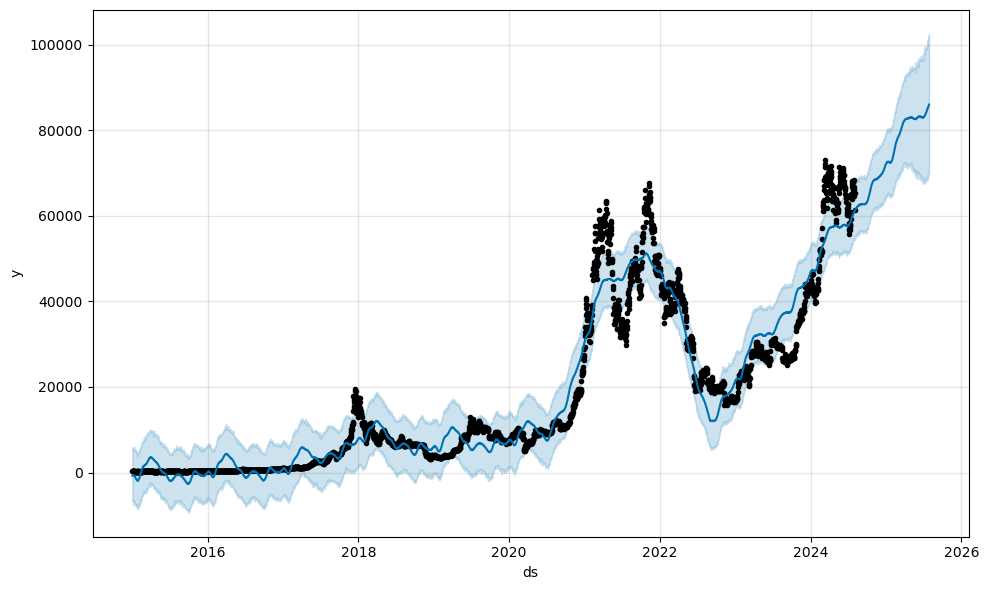

In [169]:
model.plot(tahmin)


C:\Users\ENİSE AHSEN\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ENİSE AHSEN\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ENİSE AHSEN\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

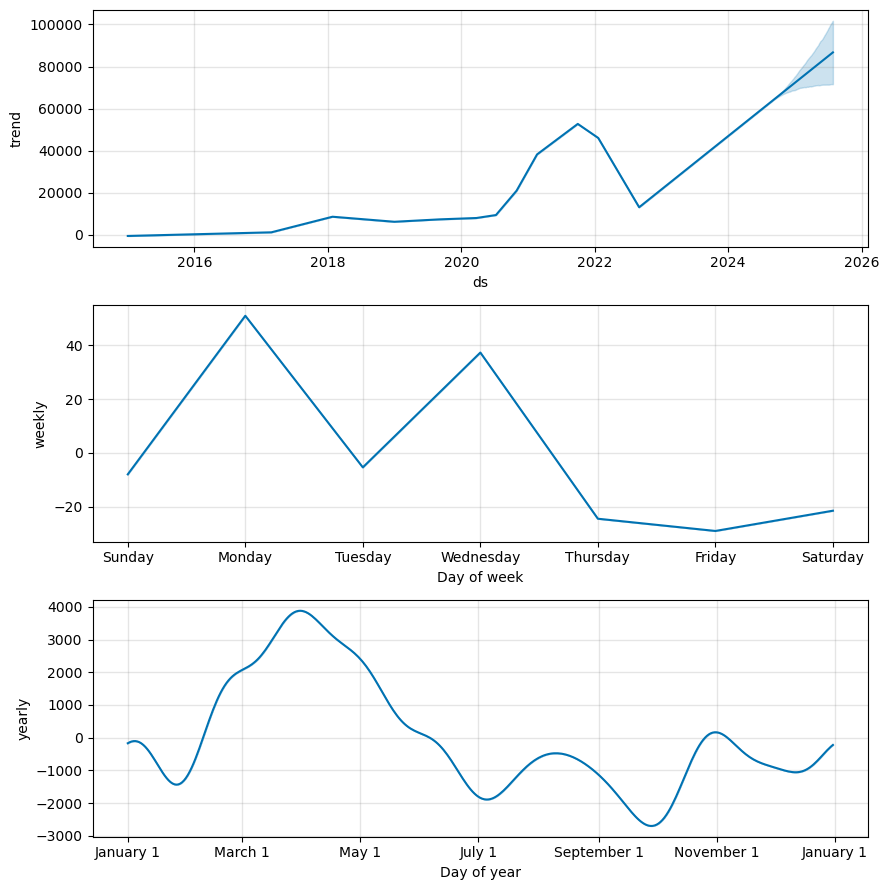

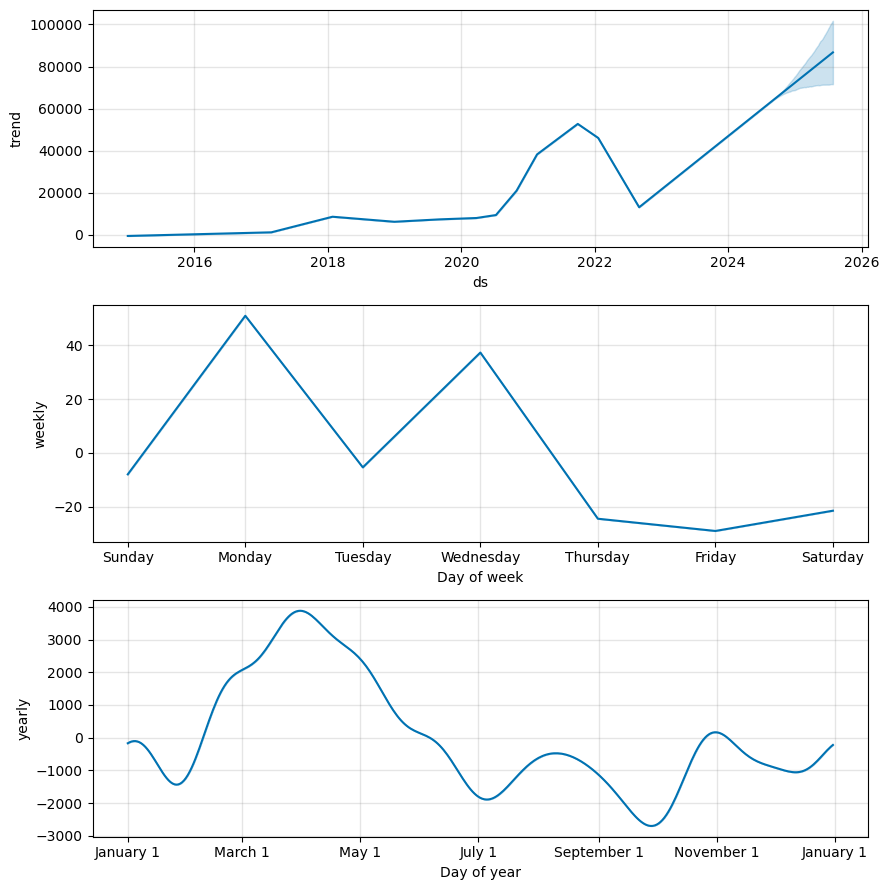

In [175]:
model.plot_components(tahmin)